In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal, Annotated
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_openai import ChatOpenAI
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver

/Users/niravpolara/PycharmProjects/AI-Learning-Journey/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class Chatstate(TypedDict):
    
    messages: Annotated[list[BaseMessage], add_messages]
    
    

In [3]:
llm = ChatOpenAI()

In [4]:
def chat_node(state: Chatstate) -> Chatstate:
    
    messages = state['messages']
    
    response = llm.invoke(messages)
    
    return {'messages':  [response]}

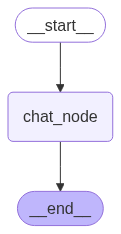

In [5]:
checkpoint = MemorySaver()

graph = StateGraph(Chatstate)

graph.add_node('chat_node', chat_node)


graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)

chatbot = graph.compile(checkpoint)

chatbot

In [6]:
initial_state = {
    'messages': [HumanMessage(content="Hello! How are you?")]
}

chatbot.invoke(initial_state)

ValueError: Checkpointer requires one or more of the following 'configurable' keys: thread_id, checkpoint_ns, checkpoint_id

In [ ]:
chatbot.invoke(initial_state)['messages'][0].content


'Hello! How are you?'

In [ ]:
chatbot.invoke(initial_state)['messages'][-1].content


"Hello! I'm just a virtual assistant, so I don't have feelings, but I'm here to help you with whatever you need. How can I assist you today?"

In [8]:
thread_id = '1'

while True:
    
    user_input = input("Type here: ")
    print(f"You: {user_input}")
    
    if user_input.lower() in ['exit', 'quit']:
        print("Exiting the chatbot. Goodbye!")
        break
    
    config = {'configurable': {'thread_id': thread_id}}

    response = chatbot.invoke({
        'messages': [HumanMessage(content=user_input)]}, config=config)

    bot_message = response['messages'][-1]
    print(f"Bot: {bot_message.content}")
    initial_state['messages'].append(bot_message)

You: hey
Bot: Hello! How can I assist you today?
You: my name is nirav
Bot: Nice to meet you, Nirav! How can I help you today?
You: what is my name?
Bot: Your name is Nirav. How can I assist you today, Nirav?
You: thank you exit
Bot: You're welcome! If you have any other questions in the future, feel free to ask. Have a great day! Goodbye!
You: ok
Bot: Goodbye!
You: quit
Exiting the chatbot. Goodbye!


In [10]:
chatbot.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='hey', additional_kwargs={}, response_metadata={}, id='2aad01b5-6f53-4c56-9ede-aa9d6875a827'), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CHEagPdtJsY42BHq15pVCvE1rJBdH', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--2430a96a-ffc9-4b76-98c4-03506e549290-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), HumanMessage(content='my name is 